# Exploratory Data Analysis (2014 - Present)
In this EDA we'll look at all the data we have from 2014 onwards. This will include:

1. Recruiting class information, including blue-chip ratio
2. Previous success information, including team ELO ratings and number of wins
3. Returning talent metrics from previous season

**Note:** For predicting season in year n, we need the returning players and recruiting info for year n and the season statistics and wins from year n-1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Team Records
- **NOTE:** One goal is to predict wins. This means we need to use one seasons info to predict the NEXT season's wins.
- Data about recruiting, returning talent, and coaches need to be SAME as year of wins
- Data about on-field performance needs to be N-1 year of wins

In [17]:
# Get records for teams
records_df = pd.read_csv('./data/team_records_by_year.csv')

# Get records from 2013 so we can track previous win percentage
records_df = records_df[records_df.year >= 2013].copy()

# Calculate win percentage
records_df['win_pct'] = records_df['wins']/records_df['games_played']
records_df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,home_wins,home_losses,away_wins,away_losses,win_pct
1533,Air Force,2005,2013,Mountain West,12,4.9,2,10,2,5,0,5,0.166667
1534,Akron,2006,2013,Mid-American,12,5.2,5,7,3,3,2,4,0.416667
1535,Alabama,333,2013,SEC,13,10.9,11,2,7,0,3,1,0.846154
1536,Arizona,12,2013,Pac-12,13,7.7,8,5,4,2,3,3,0.615385
1537,Arizona State,9,2013,Pac-12,14,7.5,10,4,7,1,3,1,0.714286


In [19]:
# Calculate previous year win percentage
records_df = records_df.sort_values(by=['team', 'year'])
records_df['prev_win_pct'] = records_df.groupby('team')['win_pct'].shift()

# Now drop the year 2013
records_df = records_df[records_df['year'] > 2013]

records_df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,home_wins,home_losses,away_wins,away_losses,win_pct,prev_win_pct
1657,Air Force,2005,2014,Mountain West,13,9.7,10,3,6,0,3,3,0.769231,0.166667
1784,Air Force,2005,2015,Mountain West,14,8.2,8,6,6,0,2,5,0.571429,0.769231
1911,Air Force,2005,2016,Mountain West,13,9.4,10,3,5,1,4,1,0.769231,0.571429
2038,Air Force,2005,2017,Mountain West,12,4.4,5,7,3,3,2,4,0.416667,0.769231
2167,Air Force,2005,2018,Mountain West,12,6.4,5,7,4,2,1,5,0.416667,0.416667


In [21]:
# Remove some not needed columns
records_2014_df = records_df.drop(columns=['home_wins', 'home_losses', 'away_wins', 'away_losses'], axis=1)
records_2014_df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,win_pct,prev_win_pct
1657,Air Force,2005,2014,Mountain West,13,9.7,10,3,0.769231,0.166667
1784,Air Force,2005,2015,Mountain West,14,8.2,8,6,0.571429,0.769231
1911,Air Force,2005,2016,Mountain West,13,9.4,10,3,0.769231,0.571429
2038,Air Force,2005,2017,Mountain West,12,4.4,5,7,0.416667,0.769231
2167,Air Force,2005,2018,Mountain West,12,6.4,5,7,0.416667,0.416667


In [3]:
records_2014_df[records_2014_df.team == 'Maryland']

,team,team_id,year,conference,games_played,expected_wins,wins,losses
1709,Maryland,120,2014,Big Ten,13,5.0,7,6
1837,Maryland,120,2015,Big Ten,12,3.8,3,9
1964,Maryland,120,2016,Big Ten,13,5.4,6,7
2092,Maryland,120,2017,Big Ten,12,3.1,4,8
2222,Maryland,120,2018,Big Ten,12,6.0,5,7
2352,Maryland,120,2019,Big Ten,12,3.3,3,9
2481,Maryland,120,2020,Big Ten,5,2.3,2,3
2610,Maryland,120,2021,Big Ten,13,6.1,7,6
2741,Maryland,120,2022,Big Ten,13,6.8,8,5
2873,Maryland,120,2023,Big Ten,13,8.7,8,5


#### Recruiting

In [22]:
# Get recruiting info
recruiting_df = pd.read_csv('./data/team_recruiting_w_blue_chip_ratios.csv')

# Filter the years we need
recruiting_2014_df = recruiting_df[recruiting_df.year >= 2014].copy()

# Remove/rename some columns
recruiting_2014_df = recruiting_2014_df.drop(columns=['total', 'blue_sums', 'total_sums'])
recruiting_2014_df = recruiting_2014_df.rename(columns={'rank': 'recruiting_rank'})
recruiting_2014_df.head()

,team,year,recruiting_rank,points,blue_chip,blue_chip_ratio
654,Alabama,2014,1,319.71,20.0,0.755319
655,LSU,2014,2,299.29,16.0,0.659341
656,Ohio State,2014,3,296.08,16.0,0.673684
657,Florida State,2014,4,286.79,15.0,0.586957
658,Texas A&M,2014,5,278.08,12.0,0.459770


In [23]:
recruiting_2014_df.year.max()

2024

#### Returning Talent
- Need year n to predict year n
- Note that we don't need the conference here also some of the conferences aren't updated
- ex. Maryland is listed in 2014 as being in ACC, but they moved to the Big Ten for the 2014-2015 season

In [24]:
returning_df = pd.read_csv('data/returning_players_2014.csv')
returning_df = returning_df.drop(columns=['conference']).copy()
returning_df.head()

,year,team,passing_usage,rushing_usage,usages
0,2014,Air Force,0.751,0.652,0.684
1,2014,Akron,1.000,0.989,0.952
2,2014,Alabama,0.078,0.911,0.589
3,2014,Arizona,0.000,0.048,0.142
4,2014,Arizona State,0.990,0.562,0.713


In [25]:
returning_df[(returning_df.team == 'Maryland')]

,year,team,passing_usage,rushing_usage,usages
51,2014,Maryland,1.000,0.991,0.946
178,2015,Maryland,0.107,0.601,0.340
307,2016,Maryland,0.946,0.615,0.799
435,2017,Maryland,0.311,0.554,0.422
564,2018,Maryland,0.851,0.957,0.792
694,2019,Maryland,0.311,0.748,0.587
824,2020,Maryland,0.665,0.318,0.501
953,2021,Maryland,0.913,0.472,0.675
1081,2022,Maryland,0.964,0.476,0.676
1212,2023,Maryland,0.975,0.979,0.880


#### ELO/FPI Ratings
- Need year n-1 to predict year n
- We will ADD 1 to each year so that each one represents the ELO rating at the START of each year.
- These ratings are at the END of each year. For example, Notre Dame's peaks in 2012 when they went to the national championship game.
- Another example is South Carolina, which peaks at the END of 2013, the last season they were good

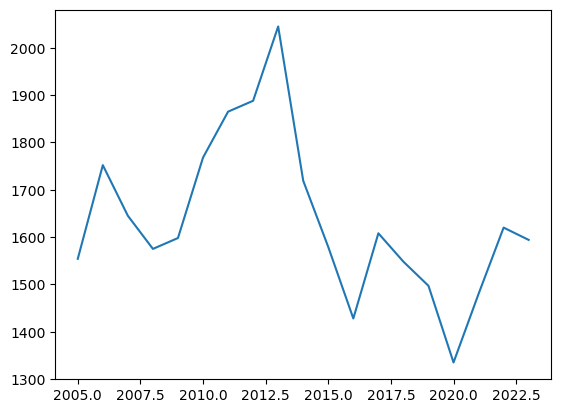

In [26]:
ratings_df = pd.read_csv('data/team_conference_ratings.csv')

plt.plot(ratings_df[ratings_df.team == 'South Carolina'].year, ratings_df[ratings_df.team == 'South Carolina'].elo)

In [27]:
# Grab data going back to 2013, 1 year before starting analysis
ratings_2014_df = ratings_df[ratings_df.year >= 2013].copy()

# Relabel years by +1 so they are rating at start of new season
ratings_2014_df['year'] = ratings_2014_df['year'] + 1

ratings_2014_df.head()

,team,year,conference,elo,fpi,conference_rating
875,Air Force,2014,Mountain West,1071.0,-16.682,-5.908333
876,Akron,2014,Mid-American,1121.0,-12.121,-12.792308
877,Alabama,2014,SEC,2114.0,28.891,15.450000
878,Arizona,2014,Pac-12,1652.0,13.168,14.000000
879,Arizona State,2014,Pac-12,1823.0,21.855,14.000000


#### Last Season Advanced Stats
- Need year n-1 to predict year n
- Perform relabeling here so that advanced stats are from LAST season. Add 1 to each year
- Drop the conference column here as well as there are some years where the conference was not updated after a switch was made

In [28]:
stats_df = pd.read_csv('data/advanced_stats_seasons.csv')

# Switch names of a few categories and drop uneeded columns
stats_df = stats_df.rename(columns={'season': 'year'})
stats_df = stats_df.drop(columns=['offense', 'defense', 'conference'])

# Switch year by 1 so we're getting last seasons stats
stats_df['year'] = stats_df['year'] + 1

# Filter data from 2014 - 2023 (10 years of data)
stats_2014_df = stats_df[stats_df['year'] >= 2014].copy()
stats_2014_df.head()

,year,team,off_drives,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate
12,2014,Air Force,139,137,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913
13,2015,Air Force,165,161,1.089935,1.425767,0.207059,0.138795,0.451837,0.375831
14,2016,Air Force,177,173,1.154045,1.549206,0.272449,0.172654,0.474216,0.357631
15,2017,Air Force,147,148,1.027586,1.534094,0.227697,0.158770,0.483333,0.366048
16,2018,Air Force,138,139,1.095699,1.374592,0.235542,0.247661,0.488398,0.422096


### Coaching Information
- Need year n to predict year n

In [29]:
coaches_df = pd.read_csv('data/coaches.csv')
coaches_df = coaches_df.rename(columns={'name': 'coach'})
coaches_df.head()

,coach,team,year
0,Terry Allen,Kansas,2000
1,Barry Alvarez,Wisconsin,2000
2,Chuck Amato,NC State,2000
3,Dave Baldwin,San José State,2000
4,Jerry Baldwin,Louisiana,2000


### Combine Features
1. records_2014_df
2. recruiting_2014_df
3. returning_df
4. ratings_2014_df

In [32]:
df = records_2014_df.merge(ratings_2014_df, on=['year', 'team', 'conference']) \
                        .merge(recruiting_2014_df, on=['year', 'team']) \
                        .merge(returning_df, on=['year', 'team']) \
                        .merge(stats_2014_df, on=['year', 'team']) \
                        .merge(coaches_df, on=['year', 'team'])
df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,win_pct,prev_win_pct,...,usages,off_drives,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate,coach
0,Air Force,2005,2014,Mountain West,13,9.7,10,3,0.769231,0.166667,...,0.684,139,137,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913,Troy Calhoun
1,Air Force,2005,2015,Mountain West,14,8.2,8,6,0.571429,0.769231,...,0.646,165,161,1.089935,1.425767,0.207059,0.138795,0.451837,0.375831,Troy Calhoun
2,Air Force,2005,2016,Mountain West,13,9.4,10,3,0.769231,0.571429,...,0.625,177,173,1.154045,1.549206,0.272449,0.172654,0.474216,0.357631,Troy Calhoun
3,Air Force,2005,2017,Mountain West,12,4.4,5,7,0.416667,0.769231,...,0.556,147,148,1.027586,1.534094,0.227697,0.158770,0.483333,0.366048,Troy Calhoun
4,Air Force,2005,2018,Mountain West,12,6.4,5,7,0.416667,0.416667,...,0.720,138,139,1.095699,1.374592,0.235542,0.247661,0.488398,0.422096,Troy Calhoun


In [33]:
df.columns

Index(['team', 'team_id', 'year', 'conference', 'games_played',
       'expected_wins', 'wins', 'losses', 'win_pct', 'prev_win_pct', 'elo',
       'fpi', 'conference_rating', 'recruiting_rank', 'points', 'blue_chip',
       'blue_chip_ratio', 'passing_usage', 'rushing_usage', 'usages',
       'off_drives', 'def_drives', 'off_explode', 'def_explode', 'off_ppa',
       'def_ppa', 'off_success_rate', 'def_success_rate', 'coach'],
      dtype='object')

In [34]:
# Save this dataframe as the "working dataframe" for later use
df.to_csv('data/working_df.csv', index=False)

#### Correlations between features

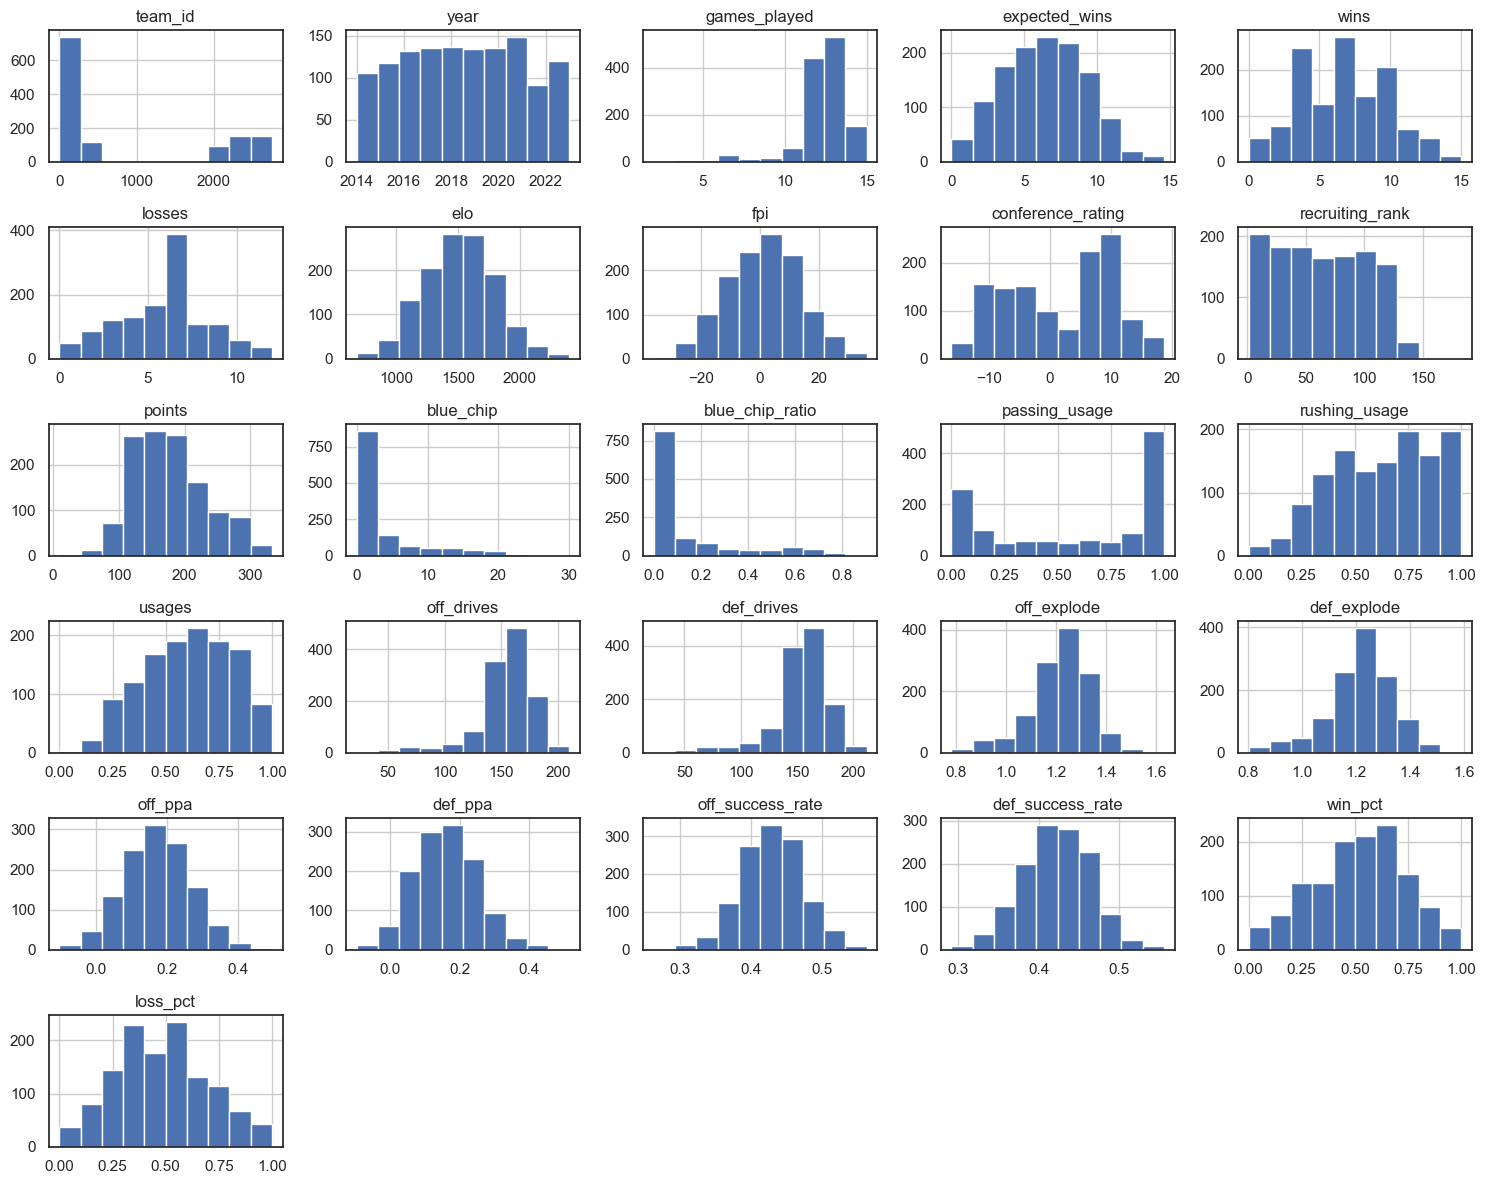

In [18]:
sns.set_theme(style='white')
df.hist(figsize=(15,12))
plt.tight_layout()
plt.savefig('images/numeric_features_histograms.png')
plt.show()

In [19]:
df.columns

Index(['team', 'team_id', 'year', 'conference', 'games_played',
       'expected_wins', 'wins', 'losses', 'elo', 'fpi', 'conference_rating',
       'recruiting_rank', 'points', 'blue_chip', 'blue_chip_ratio',
       'passing_usage', 'rushing_usage', 'usages', 'off_drives', 'def_drives',
       'off_explode', 'def_explode', 'off_ppa', 'def_ppa', 'off_success_rate',
       'def_success_rate', 'coach', 'win_pct', 'loss_pct'],
      dtype='object')

#### Correlations between Numeric Features

In [20]:
# Get numeric features
numeric = df[['win_pct', 'loss_pct', 'games_played', 'elo', 'fpi', 'conference_rating', 'recruiting_rank', 
              'points', 'blue_chip_ratio', 'passing_usage', 'rushing_usage', 'off_success_rate', 'def_success_rate',
              'usages', 'off_drives', 'def_drives', 'off_explode', 'def_explode', 'off_ppa', 'def_ppa']]

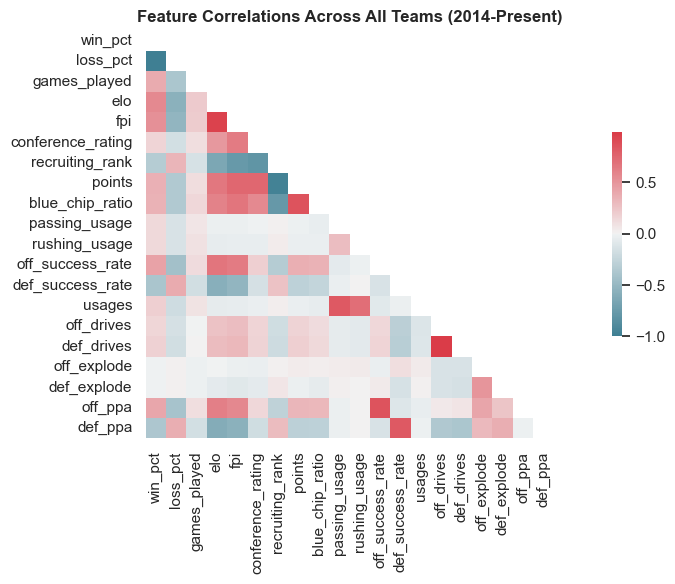

In [21]:
from seaborn import set_style
sns.set_theme(style='white')
# Calculate the correlations amongst features 
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

# Create nicer lower triangular seaborn correlation heatmap. Use diverging color palette to get -1,0,1
fig, ax = plt.subplots(figsize=(12,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, # Data
            mask=mask, # Mask certain cells
            cmap=cmap, # Colormap
            square=True, # Make squares
            #grid = False,
            #annot=True, # Show values
            #annot_kws={'size':6},
            #vmax=0.5, # Set scale for colors (all above will have same)
            #vmin=-0.5, # Min scale
            center=0, # Force center which is white for diverging palette
            #linewidths=0, # Width of line between squares
            cbar_kws={'shrink':0.5}) # Size of legend
plt.title('Feature Correlations Across All Teams (2014-Present)', fontweight='bold')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', bbox_inches='tight')
plt.show()


In [22]:
# Save heatmap and table of values
corr.to_csv('out/correlation_table.csv')

big_win_corr = corr['win_pct'].sort_values(ascending=False)
biggest_corr_list = list(big_win_corr)
big_win_corr

win_pct              1.000000
elo                  0.564849
fpi                  0.523308
off_success_rate     0.431678
off_ppa              0.407330
games_played         0.385284
points               0.355091
blue_chip_ratio      0.349973
usages               0.188481
def_drives           0.174584
conference_rating    0.163233
off_drives           0.153882
passing_usage        0.137505
rushing_usage        0.133017
off_explode         -0.009320
def_explode         -0.013521
recruiting_rank     -0.331127
def_ppa             -0.371558
def_success_rate    -0.388406
loss_pct            -1.000000
Name: win_pct, dtype: float64

#### Investigating Correlated Variables with Win Percentage
- Positive: elo, fpi, points, blue_chip_ratio, off_success_rate, off_ppa
- Negative: recruiting_rank, def_success_rate, def_ppa

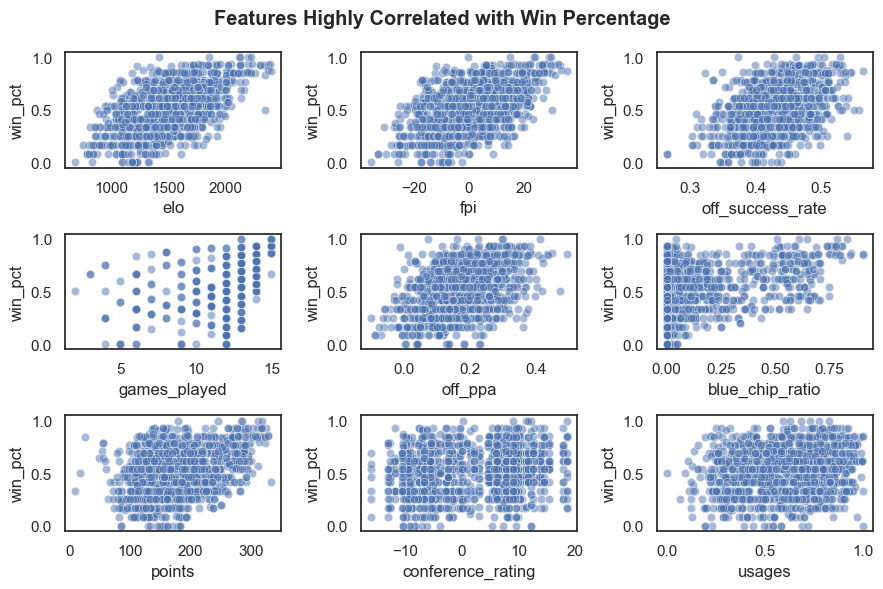

In [23]:
features = ['elo', 'fpi', 'off_success_rate', 'games_played', 'off_ppa', 
            'blue_chip_ratio', 'points', 'conference_rating', 'usages']
fig, axes = plt.subplots(3,3, figsize=(9,6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.scatterplot(data=numeric, x=features[i], y='win_pct', ax=ax, alpha=0.5)

plt.suptitle('Features Highly Correlated with Win Percentage', fontweight='bold')
plt.tight_layout()
plt.savefig('images/high-correlated-with-win-pct.png')
plt.show()

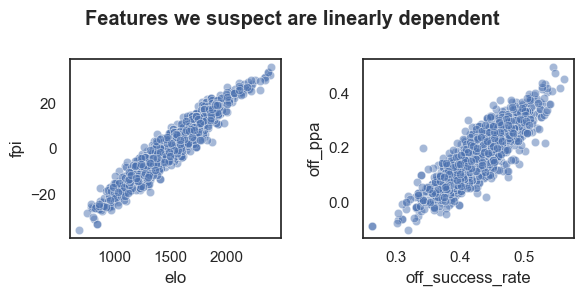

In [24]:
# Plot some features against each other that look highly correlated
features = ['elo', 'fpi', 'off_success_rate', 'off_ppa']
fig, axes = plt.subplots(1,2, figsize=(6,3))
sns.scatterplot(data=numeric, x='elo', y='fpi', ax=axes[0], alpha=0.5)
sns.scatterplot(data=numeric, x='off_success_rate', y='off_ppa', ax=axes[1], alpha=0.5)
plt.suptitle('Features we suspect are linearly dependent', fontweight='bold')
plt.tight_layout()
plt.savefig('images/possibly-dependent-features.png')
plt.show()

ELO and FPI as well as Offensive success rate and offensive predicted points added, are clearly in someway linearly dependent or similiarly calculated. Off_ppa and success rate makes sense. FPI is proprietary.

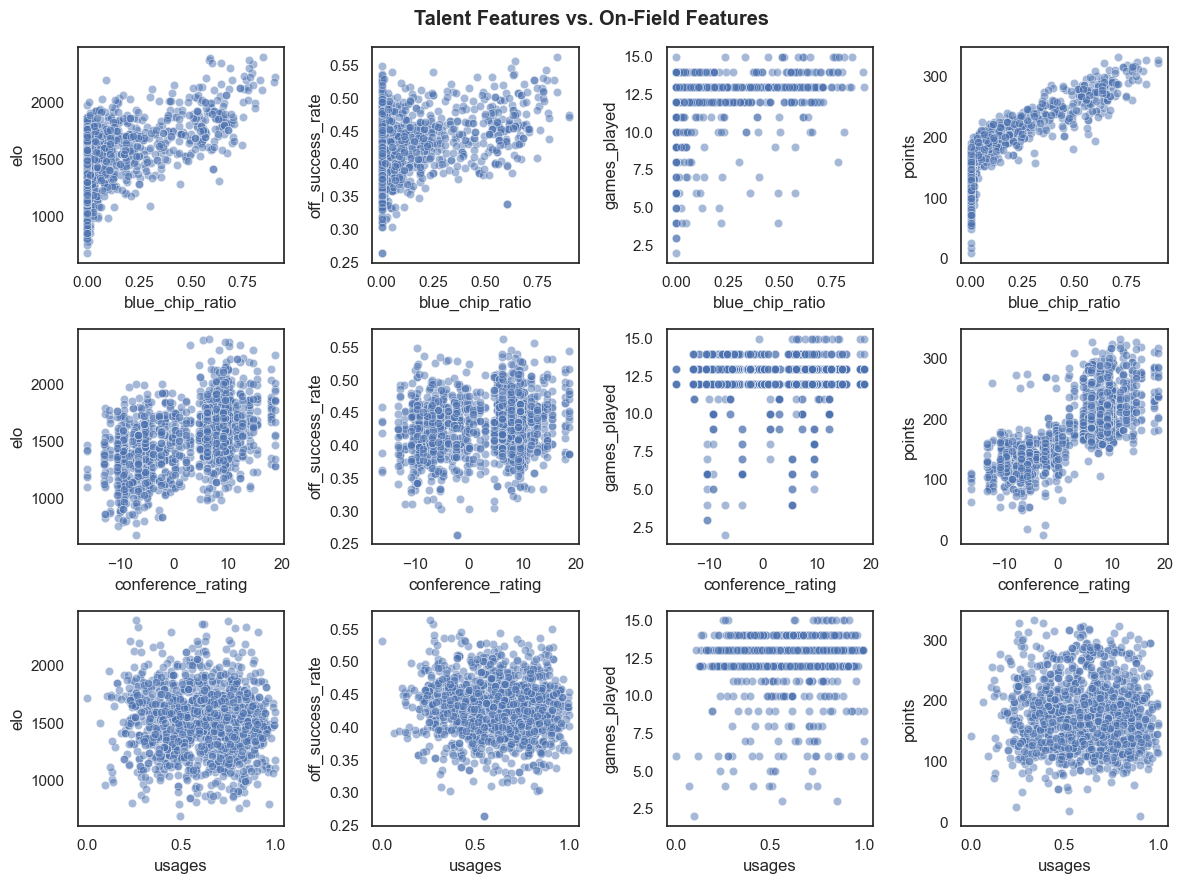

In [25]:
# Plot talent features against on field features
talent_features = ['blue_chip_ratio', 'conference_rating', 'usages']
on_field_features = ['elo', 'off_success_rate', 'games_played', 'points']
fig, axes = plt.subplots(len(talent_features),len(on_field_features), figsize=(12,9))

for i, talent_feature in enumerate(talent_features):
    for j, on_field_feature in enumerate(on_field_features):
        ax = axes[i,j]
        sns.scatterplot(data=numeric, x=talent_feature, y=on_field_feature, ax=ax, alpha=0.5)

plt.suptitle('Talent Features vs. On-Field Features', fontweight='bold')
plt.tight_layout()
plt.savefig('images/talent-vs-onfield-features.png')
plt.show()

### Categorical Features

In [26]:
categorical = ['team', 'conference', 'coach']
numerical = ['elo', 'win_pct', 'points', 'blue_chip_ratio']

#### Old: Cleaning Conference Data

Differences in conferences are appearing when teams switched conferences in a given year:
1. Louisville: American Athletic -> ACC in 2014
2. Maryland: ACC -> Maryland in 2014
3. New Mexico State  -> Independent in 2013, Sun Belt 2014-2017, Independent 2018-2022, Conference USA 2023 - Present
4. Rutgers -> Big East 1991-2012, AAC in 2013, Big Tem 2014-Present
5. Western Kentucky -> 99-2000 (Ohio Valley), 2001-2006 (Gateway Football Conference), 2007 (FCS Ind), 2008 (FBS Independent), 2009-2014 (Sun Belt), 2014-Present Conference USA
6. Navy 

In [ ]:
# Note above that we didn't merge on conference, because some teams chan
#(df.conference_x == df.conference_y).value_counts()

In [ ]:
#df[df.conference_x != df.conference_y][['team', 'year', 'conference_x', 'conference_y']]